<a href="https://colab.research.google.com/github/towardsai/ai-tutor-rag-system/blob/main/notebooks/Structured(JSON)_PDF_Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structuring Your Data: OpenAI Structured JSON Outputs

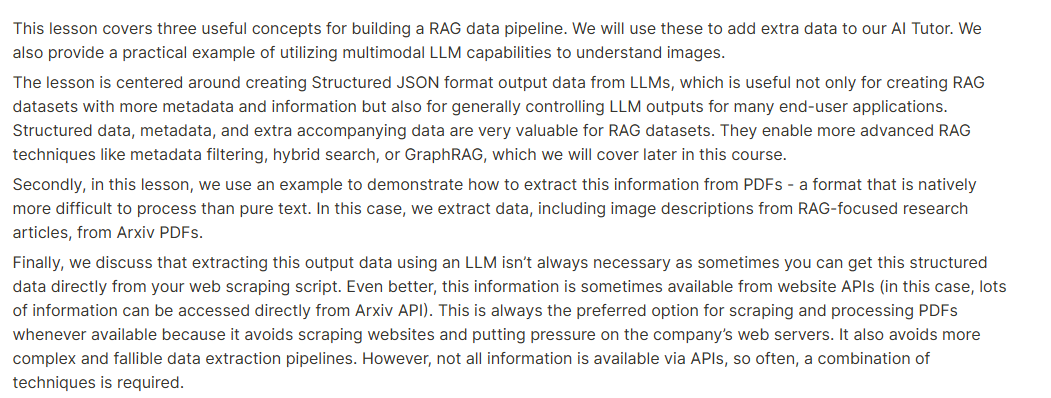

requires-python = ">=3.13"  
dependencies = [  
    "dotenv>=0.9.9",  
    "jedi>=0.19.2",  
    "llama-index>=0.14.5",  
    "llama-index-llms-openai>=0.6.5",  
    "llama-index-llms-perplexity>=0.4.2",  
    "openai>=1.109.1",  
    "pypdf>=6.1.2",  
]

In [ ]:
# !pip install -q openai==1.107.0 pypdf==6.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/310.5 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 307.2/310.5 kB 14.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv(override=True)

# Set the "OPENAI_API_KEY" in the Python environment. Will be used by OpenAI client later.
# os.environ["OPENAI_API_KEY"] = "[OPENAI_API_KEY]"

# from google.colab import userdata
# os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

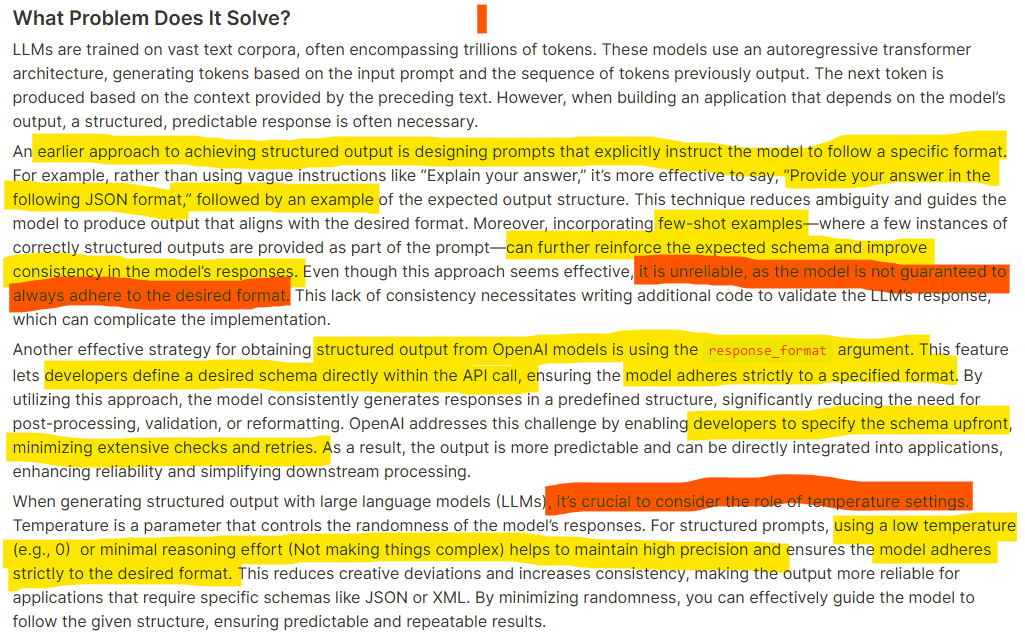

### OpenAI Structured Output without `response_format`

In [ ]:
from openai import OpenAI
client = OpenAI()

In [ ]:
system_prompt = """
You are a helpful assistant designed to output information exclusively in JSON format. Your response should contain only raw JSON data with no additional text, explanations, or comments. Do not include backticks (`) or any code block delimiters in your response.

Always use the key `"Top10BestSellingBooks"` when listing top 10 best-selling books. Follow the specified JSON structure below:

### JSON Format Example
{
  "Top10BestSellingBooks": [
    {
      "title": "Book Title",
      "author": "Author Name",
      "yearPublished": "Year",
      "summary": "Brief summary of the book."
    },
    {
      "title": "Book Title 2",
      "author": "Author Name 2",
      "yearPublished": "Year",
      "summary": "Brief summary of the book."
    }
  ]
}
Always respond with clean JSON output that can be directly used with JSON parsers like `json.loads()`.

"""

prompt = "Give me the names of the 10 best-selling books, their authors, the year they were published, and a concise summary in JSON format"

# Making the API call
response = client.responses.create(
  model="gpt-5",
  instructions=system_prompt,
  input=prompt,
  reasoning={"effort": "minimal"}
)
print(response.output[1].content[0].text)

{
  "Top10BestSellingBooks": [
    {
      "title": "Don Quixote",
      "author": "Miguel de Cervantes",
      "yearPublished": "1605",
      "summary": "A delusional nobleman, inspired by chivalric romances, embarks on misguided adventures with his loyal squire Sancho Panza, satirizing heroism and exploring reality versus illusion."
    },
    {
      "title": "A Tale of Two Cities",
      "author": "Charles Dickens",
      "yearPublished": "1859",
      "summary": "Set against the French Revolution, the fates of several characters intertwine across London and Paris, highlighting sacrifice, injustice, and resurrection."
    },
    {
      "title": "The Lord of the Rings",
      "author": "J. R. R. Tolkien",
      "yearPublished": "1954",
      "summary": "A fellowship undertakes a perilous quest to destroy a powerful ring and defeat the Dark Lord Sauron, reshaping the fate of Middle-earth."
    },
    {
      "title": "The Little Prince",
      "author": "Antoine de Saint-Exupéry",
 

In [ ]:
import json

result_book = json.loads(response.output[1].content[0].text)

print(type(result_book))

print(result_book['Top10BestSellingBooks'][0])
print("-------------------------------------")
print(result_book['Top10BestSellingBooks'][0]['title'])

<class 'dict'>
{'title': 'Don Quixote', 'author': 'Miguel de Cervantes', 'yearPublished': '1605', 'summary': 'A delusional nobleman, inspired by chivalric romances, embarks on misguided adventures with his loyal squire Sancho Panza, satirizing heroism and exploring reality versus illusion.'}
-------------------------------------
Don Quixote


## OpenAI Strucutred output (JSON) with `response_format`

In [ ]:
from openai import OpenAI
client = OpenAI()

In [ ]:
prompt = "Give me the names of the 10 best-selling books, their authors, the year they were published, and a concise summary in JSON format"

In [ ]:
# The response format- JSON schema
from pydantic import BaseModel, Field
from typing import List, Optional
from typing import List

class Books(BaseModel):
    """Summary"""
    title: str = Field(..., description="Title of the book")
    author: str = Field(..., description="Author of the book")
    yearPublished: int = Field(..., description="Year the book was published", alias="yearPublished")
    summary: str = Field(..., description="Brief summary of the book")

class BookResponseFormatJSON(BaseModel):
  Top10BestSellingBooks: List[Books] = Field(..., description="List of top 10 best-selling books")

In [ ]:
system_prompt = """
You are a helpful assistant designed to output information exclusively in JSON format.
### JSON Format Example
{
  "Top10BestSellingBooks": [
    {
      "title": "Book Title",
      "author": "Author Name",
      "yearPublished": "Year",
      "summary": "Brief summary of the book."
    }
  ]
}

"""

In [ ]:
# Making the API call
response = client.responses.parse(
  model="gpt-5",
  instructions=system_prompt,
  input=prompt,
  text_format=BookResponseFormatJSON,
  reasoning={"effort": "minimal"}
)
print(response.output_parsed)

Top10BestSellingBooks=[Books(title='Don Quixote', author='Miguel de Cervantes', yearPublished=1605, summary='A delusional hidalgo, inspired by chivalric romances, becomes a self-styled knight-errant and embarks on misadventures with his pragmatic squire, Sancho Panza, satirizing heroism and reality.'), Books(title='A Tale of Two Cities', author='Charles Dickens', yearPublished=1859, summary='Set in London and Paris during the French Revolution, the novel follows sacrifices and redemption as lives intersect amid social upheaval, culminating in a famous act of selfless love.'), Books(title='The Lord of the Rings', author='J. R. R. Tolkien', yearPublished=1954, summary='An epic quest to destroy the One Ring pits hobbits and allies against Sauron, exploring friendship, power, and the struggle between good and evil in Middle-earth.'), Books(title='The Little Prince', author='Antoine de Saint-Exupéry', yearPublished=1943, summary='A pilot stranded in the desert meets a boy from another plane

In [ ]:
print(type(response.output_parsed))

<class '__main__.BookResponseFormatJSON'>


In [ ]:
print(response.output_parsed.Top10BestSellingBooks[0])
print("----------------------------------------------")
print(response.output_parsed.Top10BestSellingBooks[0].title)

title='Don Quixote' author='Miguel de Cervantes' yearPublished=1605 summary='A delusional hidalgo, inspired by chivalric romances, becomes a self-styled knight-errant and embarks on misadventures with his pragmatic squire, Sancho Panza, satirizing heroism and reality.'
----------------------------------------------
Don Quixote


## Strucutred output from PDF + OpenAI + pdf2images

In [ ]:
from huggingface_hub import hf_hub_download
file_path = hf_hub_download(repo_id="jaiganesan/ai_tutor_knowledge", filename="rag_research_paper.zip",repo_type="dataset",local_dir="/content")

rag_research_paper.zip:   0%|          | 0.00/7.51M [00:00<?, ?B/s]

In [ ]:
!unzip /content/rag_research_paper.zip -d /content/

Archive:  /content/rag_research_paper.zip
   creating: /content/rag_research_paper/
  inflating: /content/rag_research_paper/2405.07437v2.pdf  
  inflating: /content/rag_research_paper/2407.01219v1.pdf  
  inflating: /content/rag_research_paper/2407.07858v1.pdf  
  inflating: /content/rag_research_paper/2407.08223v1.pdf  
  inflating: /content/rag_research_paper/2407.16833v1.pdf  
  inflating: /content/rag_research_paper/2407.21712v1.pdf  
  inflating: /content/rag_research_paper/2408.08067v2.pdf  
  inflating: /content/rag_research_paper/2408.08921v1.pdf  


In [ ]:
system_instruction_prompt ="""
You are an expert in extracting structured data from research paper PDFs.

Task Description:
Your task is to process an entire research paper provided as a PDF document and extract comprehensive, structured information from it. This includes all text, headlines, and detailed descriptions of visual elements. The final output must be a single, well-structured JSON object.

Must Follow Guidelines:
1.  Process the Entire PDF: Treat the input as a complete document, not as individual pages.
2.  Accurate Data Extraction: Extract all text and information with high precision. Do not summarize, paraphrase, or omit any details.
3.  Logical Structure: Organize the extracted content into logical sections based on the paper's structure (e.g., Abstract, Introduction, Methods, Results, Conclusion, Appendices).
4.  Complete Information: Ensure no information is fragmented. Merge text that spans columns or pages into coherent paragraphs and sentences.

Content Requirements:

1.  Source Identification:
    *   Accurately extract the arXiv ID (e.g., `arXiv:2405.07437v2`). Verify its correctness. If no arXiv ID is present, use `null`.

2.  Headlines and Sections:
    *   Extract all headlines and subheadlines to define the structure (e.g., "1. Introduction," "2.1. System Architecture").
    *   If a section of content has no visible headline, generate a descriptive title for it based on its content.
    *   Each distinct section of the paper should become a separate object in the final JSON output.

3.  Text Content:
    *   For each section, extract the complete and verbatim text. Preserve all technical details, equations, and specific terminology.

4.  Visual Elements (Figures, Tables, Graphs, Architectures):
    *   Within the content of each section, when you encounter a visual element, provide a detailed analysis.
    *   **Title/Caption:** Extract the exact title and caption.
    *   **Detailed Description:** Describe the visual element's purpose and what it depicts.
    *   **Key Information:** Detail the main trends, data points, comparisons, and conclusions shown. For architectures, describe the components, layers, and data flow.
    *   **Contextual Insights:** Include any related insights or explanations from the surrounding text that refer to the visual element.

Required Output Format (JSON):

Your output must be a single JSON object that strictly adheres to the following structure:

```json
{
  "source_name": "Extract complete arXiv ID including prefix (e.g., arXiv:2405.07437v2). If none, use null.",
  "source_id": "Extract complete arXiv ID including prefix (e.g., arXiv:2405.07437v2). If none, use null.",
  "research_paper_data": [
    {
      "content_title": "The title of the first section (e.g., 'Abstract').",
      "content": "The complete, verbatim text of the Abstract. Include descriptions of any visual elements if present."
    },
    {
      "content_title": "The title of the second section (e.g., '1. Introduction').",
      "content": "The complete, verbatim text of the Introduction. This section should include detailed descriptions of any figures or tables found within it, as per the 'Visual Elements' guidelines."
    },
    .
    .
    .
  ]
}
```
Key Guidelines:
- Extract exact content without summarization
- Ensure accuracy in complex technical details
- Maintain logical content organization
- Include complete visual element analysis
"""

In [ ]:
# The response format- JSON schema
class ResearchPaperData(BaseModel):
  content_title: Optional[str] = Field(..., description="Extract or generate headlines and subheadlines (e.g., Abstract, Introduction, Methods, etc). Include section titles and subsection headings.")
  content: Optional[str] = Field(..., description="For each section: - Complete text content - Visual element descriptions - Figure/graph details: * Title/caption * Description * Key trends/comparisons * Architecture details * Related insights, Don't Summarize, Extract all the Content in the section")

class ResearchPaperResponseFormatJSON(BaseModel):
  source_name: str = Field(..., description="Extract Research paper Title.")
  source_id: str = Field(..., description="Extract complete arXiv ID including prefix (e.g., arXiv:2405.07437v2). Verify ID accuracy multiple times. if there is no Arxiv ID return None")
  research_paper_data: List[ResearchPaperData] = Field(..., description="List of Extracted research paper data complete data without summarizing,")


In [ ]:
import os
import glob
import base64
import json
from pypdf import PdfReader, PdfWriter
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI()

# Parameters
PDF_FOLDER = "/content/rag_research_paper"      # Folder containing multiple PDFs
PAGES_PER_CHUNK = 5                             # Number of pages per chunk
SYSTEM_INSTRUCTION = system_instruction_prompt  # Your system prompt
RESPONSE_FORMAT = ResearchPaperResponseFormatJSON

def split_pdf_by_pages(pdf_path, pages_per_chunk=PAGES_PER_CHUNK):
    """Split a single PDF into smaller page-range chunks."""
    reader = PdfReader(pdf_path)
    total_pages = len(reader.pages)
    chunks = []

    for start in range(0, total_pages, pages_per_chunk):
        end = min(start + pages_per_chunk, total_pages)
        writer = PdfWriter()
        for page_idx in range(start, end):
            writer.add_page(reader.pages[page_idx])
        chunk_filename = f"{os.path.splitext(os.path.basename(pdf_path))[0]}_" \
                         f"pages_{start+1}_{end}.pdf"
        chunk_path = os.path.join("/content", chunk_filename)
        with open(chunk_path, "wb") as f_out:
            writer.write(f_out)
        chunks.append({"path": chunk_path, "pages": f"{start+1}-{end}"})
    return chunks

In [ ]:
def process_pdf_chunk(chunk, system_instruction, response_format):
    """Call OpenAI API to extract structured data from a PDF chunk."""
    with open(chunk["path"], "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    response = client.responses.parse(
        model="gpt-5",
        instructions=system_instruction,
        text_format=response_format,
        reasoning={"effort": "minimal"},
        input=[{
            "role": "user",
            "content": [
                {"type": "input_text", "text": f"Extract structured content from pages {chunk['pages']}."},
                {"type": "input_file", "filename": os.path.basename(chunk["path"]),
                 "file_data": f"data:application/pdf;base64,{b64}"}
            ]
        }],
    )
    return response.output_parsed.research_paper_data

In [ ]:
def convert_to_dict(obj):
    """Convert Pydantic model or custom object to dictionary."""
    if hasattr(obj, 'model_dump'):
        # For Pydantic v2
        return obj.model_dump()
    elif hasattr(obj, 'dict'):
        # For Pydantic v1
        return obj.dict()
    elif hasattr(obj, '__dict__'):
        # For regular objects
        return obj.__dict__
    else:
        # If it's already a basic type
        return obj

In [ ]:
# Main workflow
all_results = {}
pdf_paths = glob.glob(os.path.join(PDF_FOLDER, "*.pdf"))

for pdf_path in pdf_paths:
    pdf_name = os.path.basename(pdf_path)
    print(f"Processing {pdf_name}...")
    chunks = split_pdf_by_pages(pdf_path)
    results = []
    for chunk in chunks:
        data = process_pdf_chunk(chunk, SYSTEM_INSTRUCTION, RESPONSE_FORMAT)
        # Convert each ResearchPaperData object to a dictionary
        for item in data:
            results.append(convert_to_dict(item))
    all_results[pdf_name] = results

    # Remove the break if you want to process all PDFs**
    break

Processing 2407.07858v1.pdf...


In [ ]:
# Save combined results for each PDF
for pdf_name, data in all_results.items():
    out_file = f"{pdf_name.rsplit('.',1)[0]}_structured.json"
    with open(out_file, "w") as f_json:
        json.dump(data, f_json, indent=2)
    print(f"Saved structured data to {out_file}")

print("\nCleaning up temporary chunk files...")
for pdf_path in pdf_paths:
    pdf_base = os.path.splitext(os.path.basename(pdf_path))[0]
    chunk_pattern = os.path.join("/content", f"{pdf_base}_pages_*.pdf")
    for chunk_file in glob.glob(chunk_pattern):
        os.remove(chunk_file)
        print(f"Removed: {chunk_file}")

Saved structured data to 2407.07858v1_structured.json

Cleaning up temporary chunk files...
Removed: /content/2407.07858v1_pages_1_5.pdf
Removed: /content/2407.07858v1_pages_6_8.pdf


In [ ]:
all_results['2407.07858v1.pdf']

[{'content_title': 'Title, Authors, Affiliation, Contact',
  'content': 'FACTS About Building Retrieval Augmented Generation-based Chatbots\nRama Akkiraju, Anbang Xu, Deepak Bora, Tan Yu, Lu An, Vishal Seth, Aaditya Shukla, Pritam Gundecha, Hridhay Mehta, Ashwin Jha, Prithvi Raj, Abhinav Balasubramanian, Murali Maram, Guru Muthusamy, Shivakesh Reddy Annepally, Sidney Knowles, Min Du, Nick Burnett, Sean Javiya, Ashok Marannan, Mamta Kumari, Surbhi Jha, Ethan Dereszenski, Anupam Chakraborty, Subhash Ranjan, Amina Terfai, Anoop Surya, Tracey Mercer, Vinodh Kumar Thanigachalam, Tamar Bar, Sanjana Krishnan, Jasmine Jaksic, Nave Algarici, Jacob Liberman, Joey Conway, Sonu Nayyar and Justin Boitano\nNVIDIA\n{rakkiraju,anbangx,dbora}@nvidia.com'},
 {'content_title': 'ABSTRACT',
  'content': 'Enterprise chatbots, powered by generative AI, are rapidly emerg\ufffeing as the most explored initial applications of this technology in the industry, aimed at enhancing employee productivity. Retrieval A

In [ ]:
len(all_results['2407.07858v1.pdf'])

23